## Explorotary Data Analysis of Titanic Survivors

### Introduction

This exploratory data analysis discuss the survival of Titanic passengers, based on their socio-economic status (Ticket Class), gender, and age. 

We want to answers the three following hypotheses:

- Hypothese 1: Is survival rate associated to the class of a passenger (socio-economic status by ticket class)?;
- Hypothese 2: Is survival rate associated to the gender of a passenger?;
- Hypothese 3: Is survival rate  associated to the age of a passenger?

The dataset is provided by Kaggle: [Titanic Data Set](https://www.kaggle.com/c/titanic)

### Preparing the datasets

In [25]:
import pandas as pd
import numpy as np
from scipy import stats

In [26]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [27]:
train.isnull().sum()
print("Train Shape:",train.shape)
test.isnull().sum()
print("Test Shape:",test.shape)

Train Shape: (891, 12)
Test Shape: (418, 11)


In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


We can start by looking at the Summary statistics of the dataset for the Ticket Class, Age, and Gender.

In [169]:
print(train[['Pclass','Age',]].describe())

           Pclass         Age
count  891.000000  714.000000
mean     2.308642   29.699118
std      0.836071   14.526497
min      1.000000    0.420000
25%      2.000000   20.125000
50%      3.000000   28.000000
75%      3.000000   38.000000
max      3.000000   80.000000


In [171]:
print(train[['Sex']].describe(include=['object']))

         Sex
count    891
unique     2
top     male
freq     577


### Dataset Dictionary
- Survived: 0 = No, 1 = Yes
- pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
- sibsp: # of siblings / spouses aboard the Titanic
- parch: # of parents / children aboard the Titanic
- ticket: Ticket number
- cabin: Cabin number
- embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

Total rows and columns: We can verify that there are 891 rows and 12 columns in our dataset.

In [30]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


The DataFrame train is indexed with the default method. I can use the PassengerId as an index instead.

In [31]:
train = train.set_index(['PassengerId'])
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


I have also checked the train DataFrame for missing values in the columns of interest.

In [41]:
train['Survived'].isnull().sum()

0

In [43]:
train['Pclass'].isnull().sum()

0

In [44]:
train['Sex'].isnull().sum()

0

In [45]:
train['Age'].isnull().sum()

177

I have discovered 177 null values over 891 observations (Passengers) for the age variable. Missing Age data will affect Hypothese 3: Is survival rate associated to the age of a passenger?

To plot and summary this should not be a problem as they will be treated as zero(0) value. However, 177 is approximately 20% of our 891 observations dataset, which seems very significant if removed.

### Analyzing the data

As we're looking at survival rates associated with 3 different variables, we can define a function to make it easir to obtain the survival rates for each hypotheses.



In [68]:
survivor_count = train['Survived'].sum()

def survival_rate(dataframe, factor):
    '''
    dataframe - the dataframe on which to apply the analysis
    factor - the factor / column for which we want the survival rate. Should be of type string.
    This function takes a column as the factor and returns the survival rate of Titanic passengers according to this factor.
    '''
    by_factor = dataframe.groupby(factor)
    count_by_factor = by_factor['Survived'].sum()
    survival_rate = count_by_factor / survivor_count * 100
    print('Survival rates:', survival_rate, '\n \n', 'Counts: ', count_by_factor)
    return survival_rate, count_by_factor

### Correlation: Survival rate and class of a passenger (ticket class)

In [59]:
survivor_count = train['Survived'].sum()
print(survivor_count)

342


First, we can see how socio-economic status (as ticket class), impacted in survival.
We can determine how passengers are divided through ticket classes.

In [62]:
total_passenger_count = len(train['Pclass'])
first_class_count = (train['Pclass'] == 1).sum()
second_class_count = (train['Pclass'] == 2).sum()
third_class_count = (train['Pclass'] == 3).sum()

first_class =  first_class_count / total_passenger_count * 100
second_class = second_class_count / total_passenger_count * 100
third_class = third_class_count / total_passenger_count * 100

In [63]:
print('First class percentage = ', first_class, ' | Count: ', first_class_count)
print('Second class percentage = ', second_class, ' | Count: ', second_class_count)
print('Third class percentage = ', third_class, ' | Count: ', third_class_count)

First class percentage =  24.242424242424242  | Count:  216
Second class percentage =  20.65095398428732  | Count:  184
Third class percentage =  55.106621773288445  | Count:  491


We can verify that,

First class passengers represents 24.24% of the total No of passengers;
Second class passengers represents 20.65% of the total No of passengers;
Third class represents more than half of the passengers: 55.10%

We can compare the percentages obtained with the survival percentages for each Ticket Class.

In [74]:
survival_rate(train,'Pclass')

Survival rates: Pclass
1    39.766082
2    25.438596
3    34.795322
Name: Survived, dtype: float64 
 
 Counts:  Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64


(Pclass
 1    39.766082
 2    25.438596
 3    34.795322
 Name: Survived, dtype: float64,
 Pclass
 1    136
 2     87
 3    119
 Name: Survived, dtype: int64)

Interpreting the survival rates, we can verify that:

- First class represents 24.24% of the passengers, but 39.76% of the survivors
- Second class represents 20.65% of the passengers, but 25.44% of the survivors
- Third class representes 55.11% of the passengers, but 34.79% of the survivors

To get a better understanding of the results we can visualize the data on a plot by seeing how survival rates and death rates grow accordingly to the ticket class as absolute counts and percentages.

In [79]:
def counts(dataframe, factor, quality, status):
    '''
    dataframe - the dataframe on which to apply the function ('train' for the Titanic dataframe)
    factor - the column on which to perform the analysis ('Pclass' for the ticket class)
    rate - the class on which to perform the analysis ('2' for the second class)
    status - the status to be counted: survival or death; Must be a Boolean as 1 for survival and 0 for death).
    '''
    target = dataframe[factor].where(dataframe[factor] == quality)
    class_count = target.where(dataframe['Survived'] == status).count()
    return class_count

In [99]:
Class1_survival_count = counts(train, 'Pclass', 1, 1)
Class2_survival_count = counts(train, 'Pclass', 2, 1)
Class3_survival_count = counts(train, 'Pclass', 3, 1)
Class1_death_count = counts(train, 'Pclass', 1, 0)
Class2_death_count = counts(train, 'Pclass', 2, 0)
Class3_death_count = counts(train, 'Pclass', 3, 0)

In [100]:
print('Survival Count by Ticket Class')
print('First class survival count:', Class1_survival_count)
print('Second class survival count:', Class2_survival_count)
print('Third class survival count:', Class3_survival_count)
print('\nDeath Count by Ticket Class')
print('First class death count:', Class1_death_count)
print('Second class death count:', Class2_death_count)
print('Third class death count:', Class3_death_count)

Survival Count by Ticket Class
First class survival count: 136
Second class survival count: 87
Third class survival count: 119

Death Count by Ticket Class
First class death count: 80
Second class death count: 97
Third class death count: 372


As we have the counts for each Ticket Class related to Survival and Deat, we can now visualize the results by generating bar charts for absolute counts and for percentages. To do these plots we can define a function called bar_plot

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns

def bar_plot(survival_array, death_array, by_factor, x_ticks):
    """
    survival_array: a list with the survival data to be analyzed ([Class1_survival_count, Class2_survival_count, Class3_survival_count])
    death_array: a list with the death data to be analyzed ([Class1_death_count, Class2_death_count, Class3_death_count])
    by_title: the factor that is the focus of the analysis ('by Ticket Class')
    x_ticks: (eg. ['First class', 'Second class', 'Third class'])
    """
    
    abs_survival_list = np.array(survival_array)
    abs_death_list = np.array(death_array)
    N = len(abs_survival_list)
    ind = np.arange(N)
    width = 1 / N

    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))


    # Absolute count
    ax1.bar(ind, abs_survival_list, width, label='Survival', alpha=0.8)
    ax1.bar(ind, abs_death_list, width, color='#d62728', label='Death', alpha=0.8, bottom=abs_survival_list)

    plt.sca(ax1)
    plt.xticks(ind, x_ticks)

    ax1.set_title('Absolute count ' + by_factor)
    ax1.set_ylabel('Count')
    ax1.legend(loc='upper left')

    plt.setp(plt.gca().get_xticklabels(), rotation=45)


    # Percentage
    per_survival_list = (abs_survival_list / (abs_survival_list + abs_death_list)) * 100
    per_death_list = (abs_death_list / (abs_survival_list + abs_death_list)) * 100

    ax2.bar(ind, per_survival_list, width, label='Survival percentage', alpha=0.8)
    ax2.bar(ind, per_death_list, width, color='#d62728', label='Death percentage', alpha=0.8, bottom=per_survival_list)

    plt.sca(ax2)
    plt.xticks(ind, x_ticks)

    ax2.set_title('Percentage ' + by_factor)
    ax2.set_ylabel('Percentage')

    plt.setp(plt.gca().get_xticklabels(), rotation=45)

    return plt.show()

Plotting the bar chart for the Ticket Class analysis.


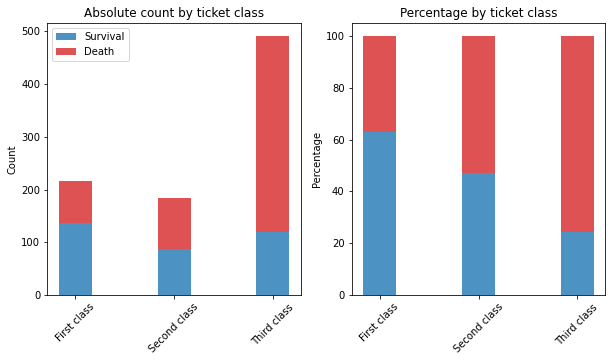

In [104]:
bar_plot([Class1_survival_count, Class2_survival_count, Class3_survival_count],
         [Class1_death_count, Class2_death_count, Class3_death_count],
         'by ticket class',
         ['First class', 'Second class', 'Third class'])

We can verify a correlation between death and ticket class being: The higher the ticket class, the higher are the chances of survival.

In [105]:
stats.chisquare(train['Survived'], train['Pclass'])

Power_divergenceResult(statistic=1592.1666666666665, pvalue=2.0399395484622444e-42)

### Correlation: Survival rate and Gender

Now we can analyze how the gender affect the chances of survival. We can defne a function to get counts of survivals and deaths by gender.

In [106]:
female_survival_count = counts(train, 'Sex', 'female', 1)
male_survival_count = counts(train, 'Sex', 'male', 1)
female_death_count = counts(train, 'Sex', 'female', 0)
male_death_count = counts(train, 'Sex', 'male', 0)

In [108]:
print('Survival Count by Gender')
print('Female survival count: ', female_survival_count)
print('Male survival count: ', male_survival_count)
print('\nDeath Count by Gender')
print('Female death count: ', female_death_count)
print('Male death count: ', male_death_count)

Survival Count by Gender
Female survival count:  233
Male survival count:  109

Death Count by Gender
Female death count:  81
Male death count:  468


Visualizing the data:

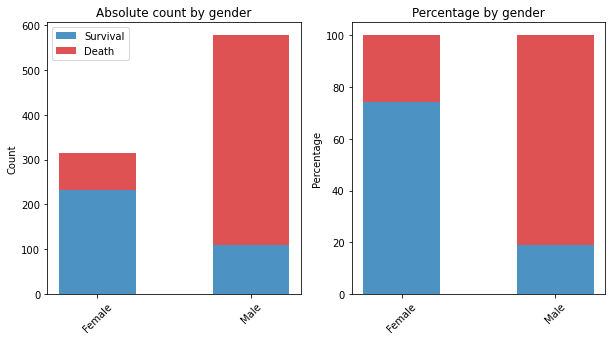

In [110]:
bar_plot([female_survival_count, male_survival_count],
         [female_death_count, male_death_count],
         'by gender',
         ['Female', 'Male'])

To verify the correlation we can state numerical values for each category by replacing values of 'Female' and'Male' as:
Female = 1
Male = 0

In [172]:
gender_train = train[['Sex', 'Survived']]
gender_train.replace(['male', 'female'], [0, 1], inplace=True)

print(gender_train[['Sex', 'Survived']].corr(method='pearson'))

               Sex  Survived
Sex       1.000000  0.543351
Survived  0.543351  1.000000


/Users/gdutra/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


The analysis shows a moderate correlation between Survival and Gender.

By analyzing the bar charts we can infer that:

- Women had a higher chance of survival than men;
- First class passengers had a higher chance of survival than third class passengers;

Therefore, what were the chances of survival of a first class woman compare to a third class man?

In [112]:
train.groupby(['Sex', 'Pclass'])['Survived'].mean() * 100

Sex     Pclass
female  1         96.808511
        2         92.105263
        3         50.000000
male    1         36.885246
        2         15.740741
        3         13.544669
Name: Survived, dtype: float64

We can infer that:

Chances of survival for a Woman on First class were 96.81%
Chances of survival for a Men on Third class were 13.54%

### Correlation: Survival rate and Age

#### Linear Regression Analysis

To analyze how the age of passengers affects the survival rate, we can investigate the survival rates of children compared to older people.

Since we have 177 NaN values on the dataset, we will have to remove these values from the dataset. It's not recommended as these values represents 20% of the number of observations, but in this specific scenario we don't have much of a choice but to remove de NaN values.

In [115]:
train_age = train[['Age' , 'Survived']].dropna(how='any')
train_age['Age'] = (np.floor(train_age['Age'])).astype(int)
train_age.shape

(714, 2)

In [118]:
train_age.head()

,Age,Survived
PassengerId,,
1,22,0
2,38,1
3,26,1
4,35,1
5,35,0


After deleting the missing values, we resulted with a new dataframe train_age with 714 observations (rows).

In [121]:
print('Yougest passenger: ' + str(train_age['Age'].min() * 12) + ' months old')
print('\nOldest passenger: ' + str(train_age['Age'].max()) + ' years old')

Yougest passenger: 0 months old

Oldest passenger: 80 years old


To perform the analysis we can round the ages up so the yougest passenger was a few months old, as the oldest was 80 years old.

We can create a new dataframe called train_ages_survival indexing Age to return the following:
- No of passengers of the indexed age who survided
- No of passengers of the indexed age who died
- Total No of passenger of the indexed age
- Percentage of survivors of the indexed age

In [122]:
ages_list = train_age['Age'].unique()
ages_list.sort()
ages_list

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 70,
       71, 74, 80])

In [123]:
train_ages_survival = pd.DataFrame(index=ages_list, columns=['Survived', 'Deaths', 'Total', 'Percentage'])

train_ages_survival['Survived'] = train_age.groupby('Age')['Survived'].sum()
train_ages_survival['Total'] = train_age.groupby('Age').count()
train_ages_survival['Deaths'] = train_ages_survival['Total'] - train_ages_survival['Survived']
train_ages_survival['Percentage'] = round(train_age.groupby('Age')['Survived'].mean() * 100, 2)

# for age in ages_list:
#     train_ages_survival.loc[age]['Survived'] = (train_age['Age'] == age).where(train_age['Survived'] == 1).sum()
#     train_ages_survival.loc[age]['Total'] = (train_age['Age'] == age).sum()
#     train_ages_survival.loc[age]['Deaths'] = train_ages_survival.loc[age]['Total'] - train_ages_survival.loc[age]['Survived']
#     train_ages_survival.loc[age]['Percentage'] = (train_ages_survival.loc[age]['Survived'] / train_ages_survival.loc[age]['Total']) * 100
#     
# train_ages_survival.head()

train_ages_survival.head()

,Survived,Deaths,Total,Percentage
0,7,0,7,100.00
1,5,2,7,71.43
2,3,7,10,30.00
3,5,1,6,83.33
4,7,3,10,70.00


We can use a Scatter Plot to visualize the data and check for outliers.

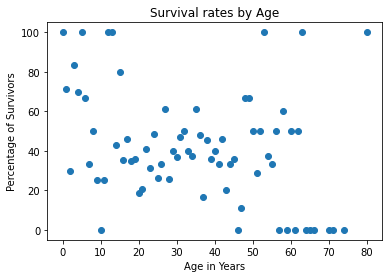

In [125]:
x = train_ages_survival['Percentage'].index
y = train_ages_survival['Percentage']
plt.scatter(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.title('Survival rates by Age')
plt.xlabel('Age in Years')
plt.ylabel('Percentage of Survivors')
plt.show()

By interpreting the Scatter plot we can verify that lower values of x return high values of y, and high values of x return lower values of y. Therefore, the younger a passenger were, higher the chances to have survived.

Also, we can verify high values of y in ages greater than 50, which suggest these values to be outliers and do not represent the general tendency of the data. We can remove the outliers from the dataframe and replot the graphic with a regression line.

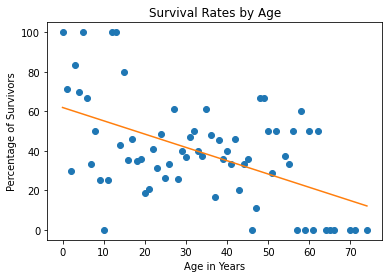

In [127]:
train_ages_survival = train_ages_survival.drop(train_ages_survival[(train_ages_survival['Percentage'] == 100) & (train_ages_survival.index > 50)].index)
x = train_ages_survival['Percentage'].index
y = train_ages_survival['Percentage']
plt.scatter(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-')
plt.title('Survival Rates by Age')
plt.xlabel('Age in Years')
plt.ylabel('Percentage of Survivors')
plt.show()

The regression line shows that the younger you were, the higher your chances to survive. We can specify more information about the regression line:



In [128]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

print('Slope: ', slope)
print('Intercept: ', intercept)
print('r_value: ', r_value)
print('r_squared: ', r_value ** 2)
print('p_value: ', p_value)
print('std_error: ', std_err)

Slope:  -0.6731448575214684
Intercept:  61.93830324815576
r_value:  -0.5279643944469165
r_squared:  0.2787464018036992
p_value:  3.7119198819980894e-06
std_error:  0.13328335798924695


To strength our analysis we can use a bar chart to analyze ages 4 and 17.

First, we can define a new function  to count number of passengers for a specific age and return the survival count and death count.

In [142]:
def age_counts(age):
    '''
    age - the age limit on which to apply the analysis
    This function returns the survival count for people under or equal to the age specified and people older than the age specified,
    and the death count people under or equal to the age specified and people older than the age specified.
    '''
    younger_target = train['Age'].where(train['Age'] <= age)
    older_target = train['Age'].where(train['Age'] > age)
    younger_survival_count = younger_target.where(train['Survived'] == 1).count()
    older_survival_count = older_target.where(train['Survived'] == 1).count()
    younger_death_count = younger_target.where(train['Survived'] == 0).count()
    older_death_count = older_target.where(train['Survived'] == 0).count()
    return younger_survival_count, older_survival_count, younger_death_count, older_death_count

In [143]:
up_to_4_survival_count, over_4_survival_count, up_to_4_death_count, over_4_death_count = age_counts(4)
up_to_17_survival_count, over_17_survival_count, up_to_17_death_count, over_17_death_count = age_counts(17)

print('Age Limit = 4')
print('Survival count for children up to 4: ', up_to_4_survival_count)
print('Survival count for people over 4: ', over_4_survival_count)
print('Death count for children up to 4: ', up_to_4_death_count)
print('Death count for people over 4: ', over_4_death_count)

print('\nAge Limite = 17')
print('Survival count for children up to 17: ', up_to_17_survival_count)
print('Survival count for people over 17: ', over_17_survival_count)
print('Death count for children up to 17: ', up_to_17_death_count)
print('Death count for people over 17: ', over_17_death_count)

Age Limit = 4
Survival count for children up to 4:  27
Survival count for people over 4:  263
Death count for children up to 4:  13
Death count for people over 4:  411

Age Limite = 17
Survival count for children up to 17:  61
Survival count for people over 17:  229
Death count for children up to 17:  52
Death count for people over 17:  372


We can plot the bar Charts to verify counts and percentages for each specific Age Limit.

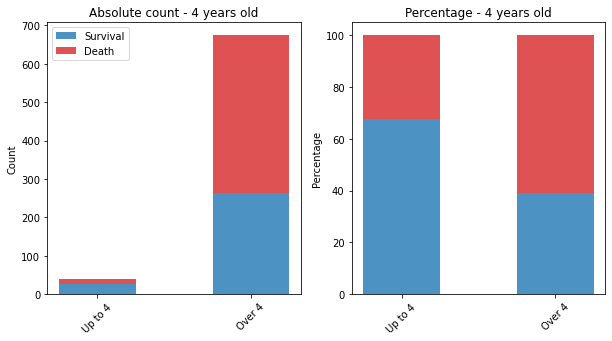

In [145]:
# Plotting for age 4
bar_plot([up_to_4_survival_count, over_4_survival_count],
         [up_to_4_death_count, over_4_death_count],
         '- 4 years old',
         ['Up to 4', 'Over 4'])

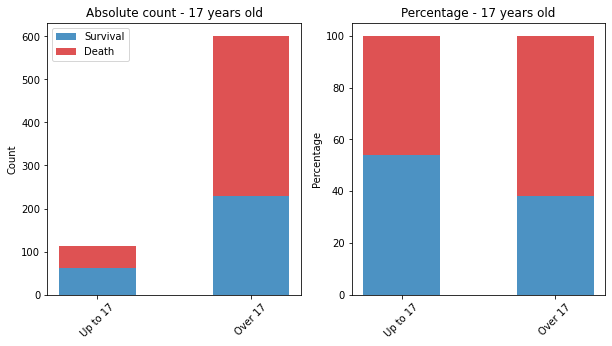

In [146]:
# Plotting for age 17
bar_plot([up_to_17_survival_count, over_17_survival_count],
         [up_to_17_death_count, over_17_death_count],
         '- 17 years old',
         ['Up to 17', 'Over 17'])

We can infer that children up to 4 years old had a higher chance of survival than people over 4 years old.

Children of 17 years old had a higher chance of survival than people over 17 years old, but lower than children up to 4 years old. The interpretation of the Bar Plots confirms our inference of the hypothesis, as the younger the passenger were, the higher the chances of survival.

### Conclusion

From this analysis, we can conclude that passengers had higher chances of survival if:

- they had a high class ticket
- they were women
- they were young

On the contrary, being a third class old man lowered the chances of survival.